# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-11-04*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import polygon_to_mask, average_data
from spatial import plot_PRD_map, plot_PRD_diff

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'WSPD10'
month = "Sep"

low_years = np.array([2016,2015,2014])
high_years = np.array([2022,2021,2019])

low_files  = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_mcip.nc") for year in low_years]
high_files = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_mcip.nc") for year in high_years]

avg_low     = average_data(low_files, var)
avg_high    = average_data(high_files, var)
avg_low_uw  = average_data(low_files, 'uwind')
avg_high_uw = average_data(high_files, 'uwind')
avg_low_vw  = average_data(low_files, 'vwind')
avg_high_vw = average_data(high_files, 'vwind')

In [3]:
hours = avg_low['time'].dt.hour
daytime_indices = (hours >= 8) & (hours <= 17)
nighttime_indices = (hours < 8) | (hours >= 18)

day_low    = avg_low.sel(time = daytime_indices).mean(dim='time')
day_high   = avg_high.sel(time = daytime_indices).mean(dim='time')
night_low  = avg_low.sel(time = nighttime_indices).mean(dim='time')
night_high = avg_high.sel(time = nighttime_indices).mean(dim='time')

uw_day_low    = avg_low_uw.sel(time = daytime_indices).mean(dim='time')
uw_day_high   = avg_high_uw.sel(time = daytime_indices).mean(dim='time')
uw_night_low  = avg_low_uw.sel(time = nighttime_indices).mean(dim='time')
uw_night_high = avg_high_uw.sel(time = nighttime_indices).mean(dim='time')

vw_day_low    = avg_low_vw.sel(time = daytime_indices).mean(dim='time')
vw_day_high   = avg_high_vw.sel(time = daytime_indices).mean(dim='time')
vw_night_low  = avg_low_vw.sel(time = nighttime_indices).mean(dim='time')
vw_night_high = avg_high_vw.sel(time = nighttime_indices).mean(dim='time')

WSPD10_day_low


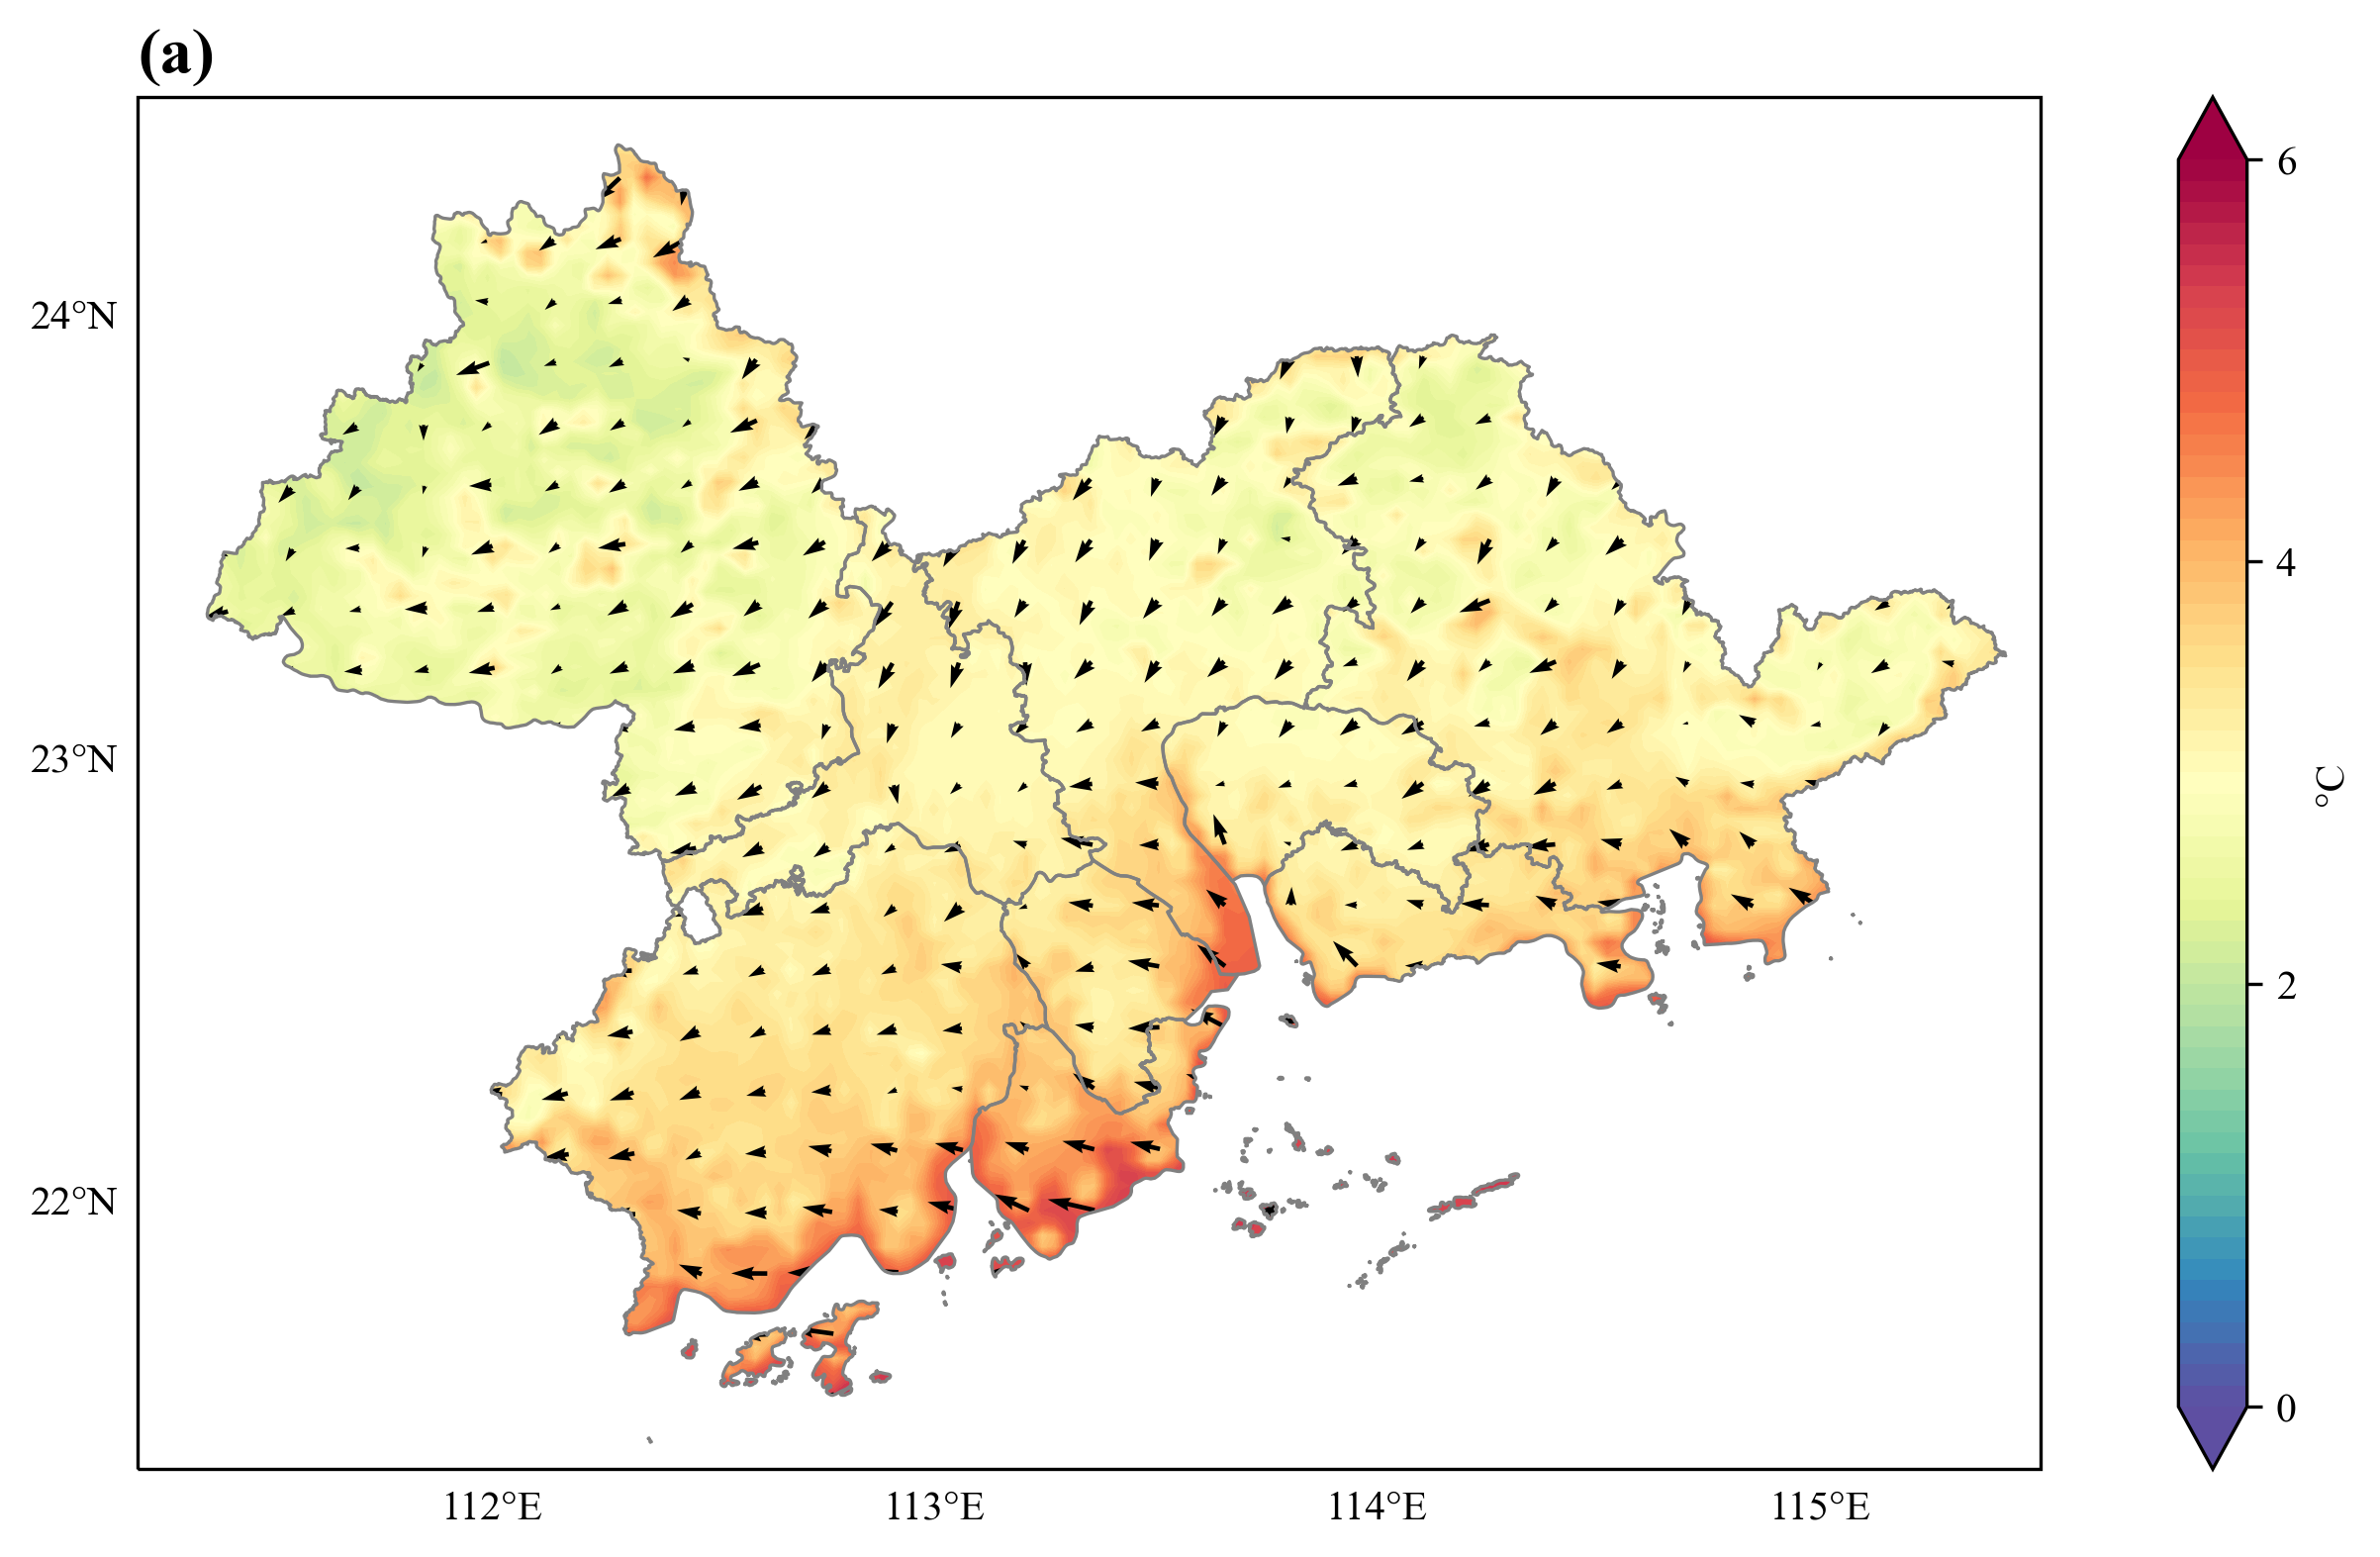

WSPD10_night_low


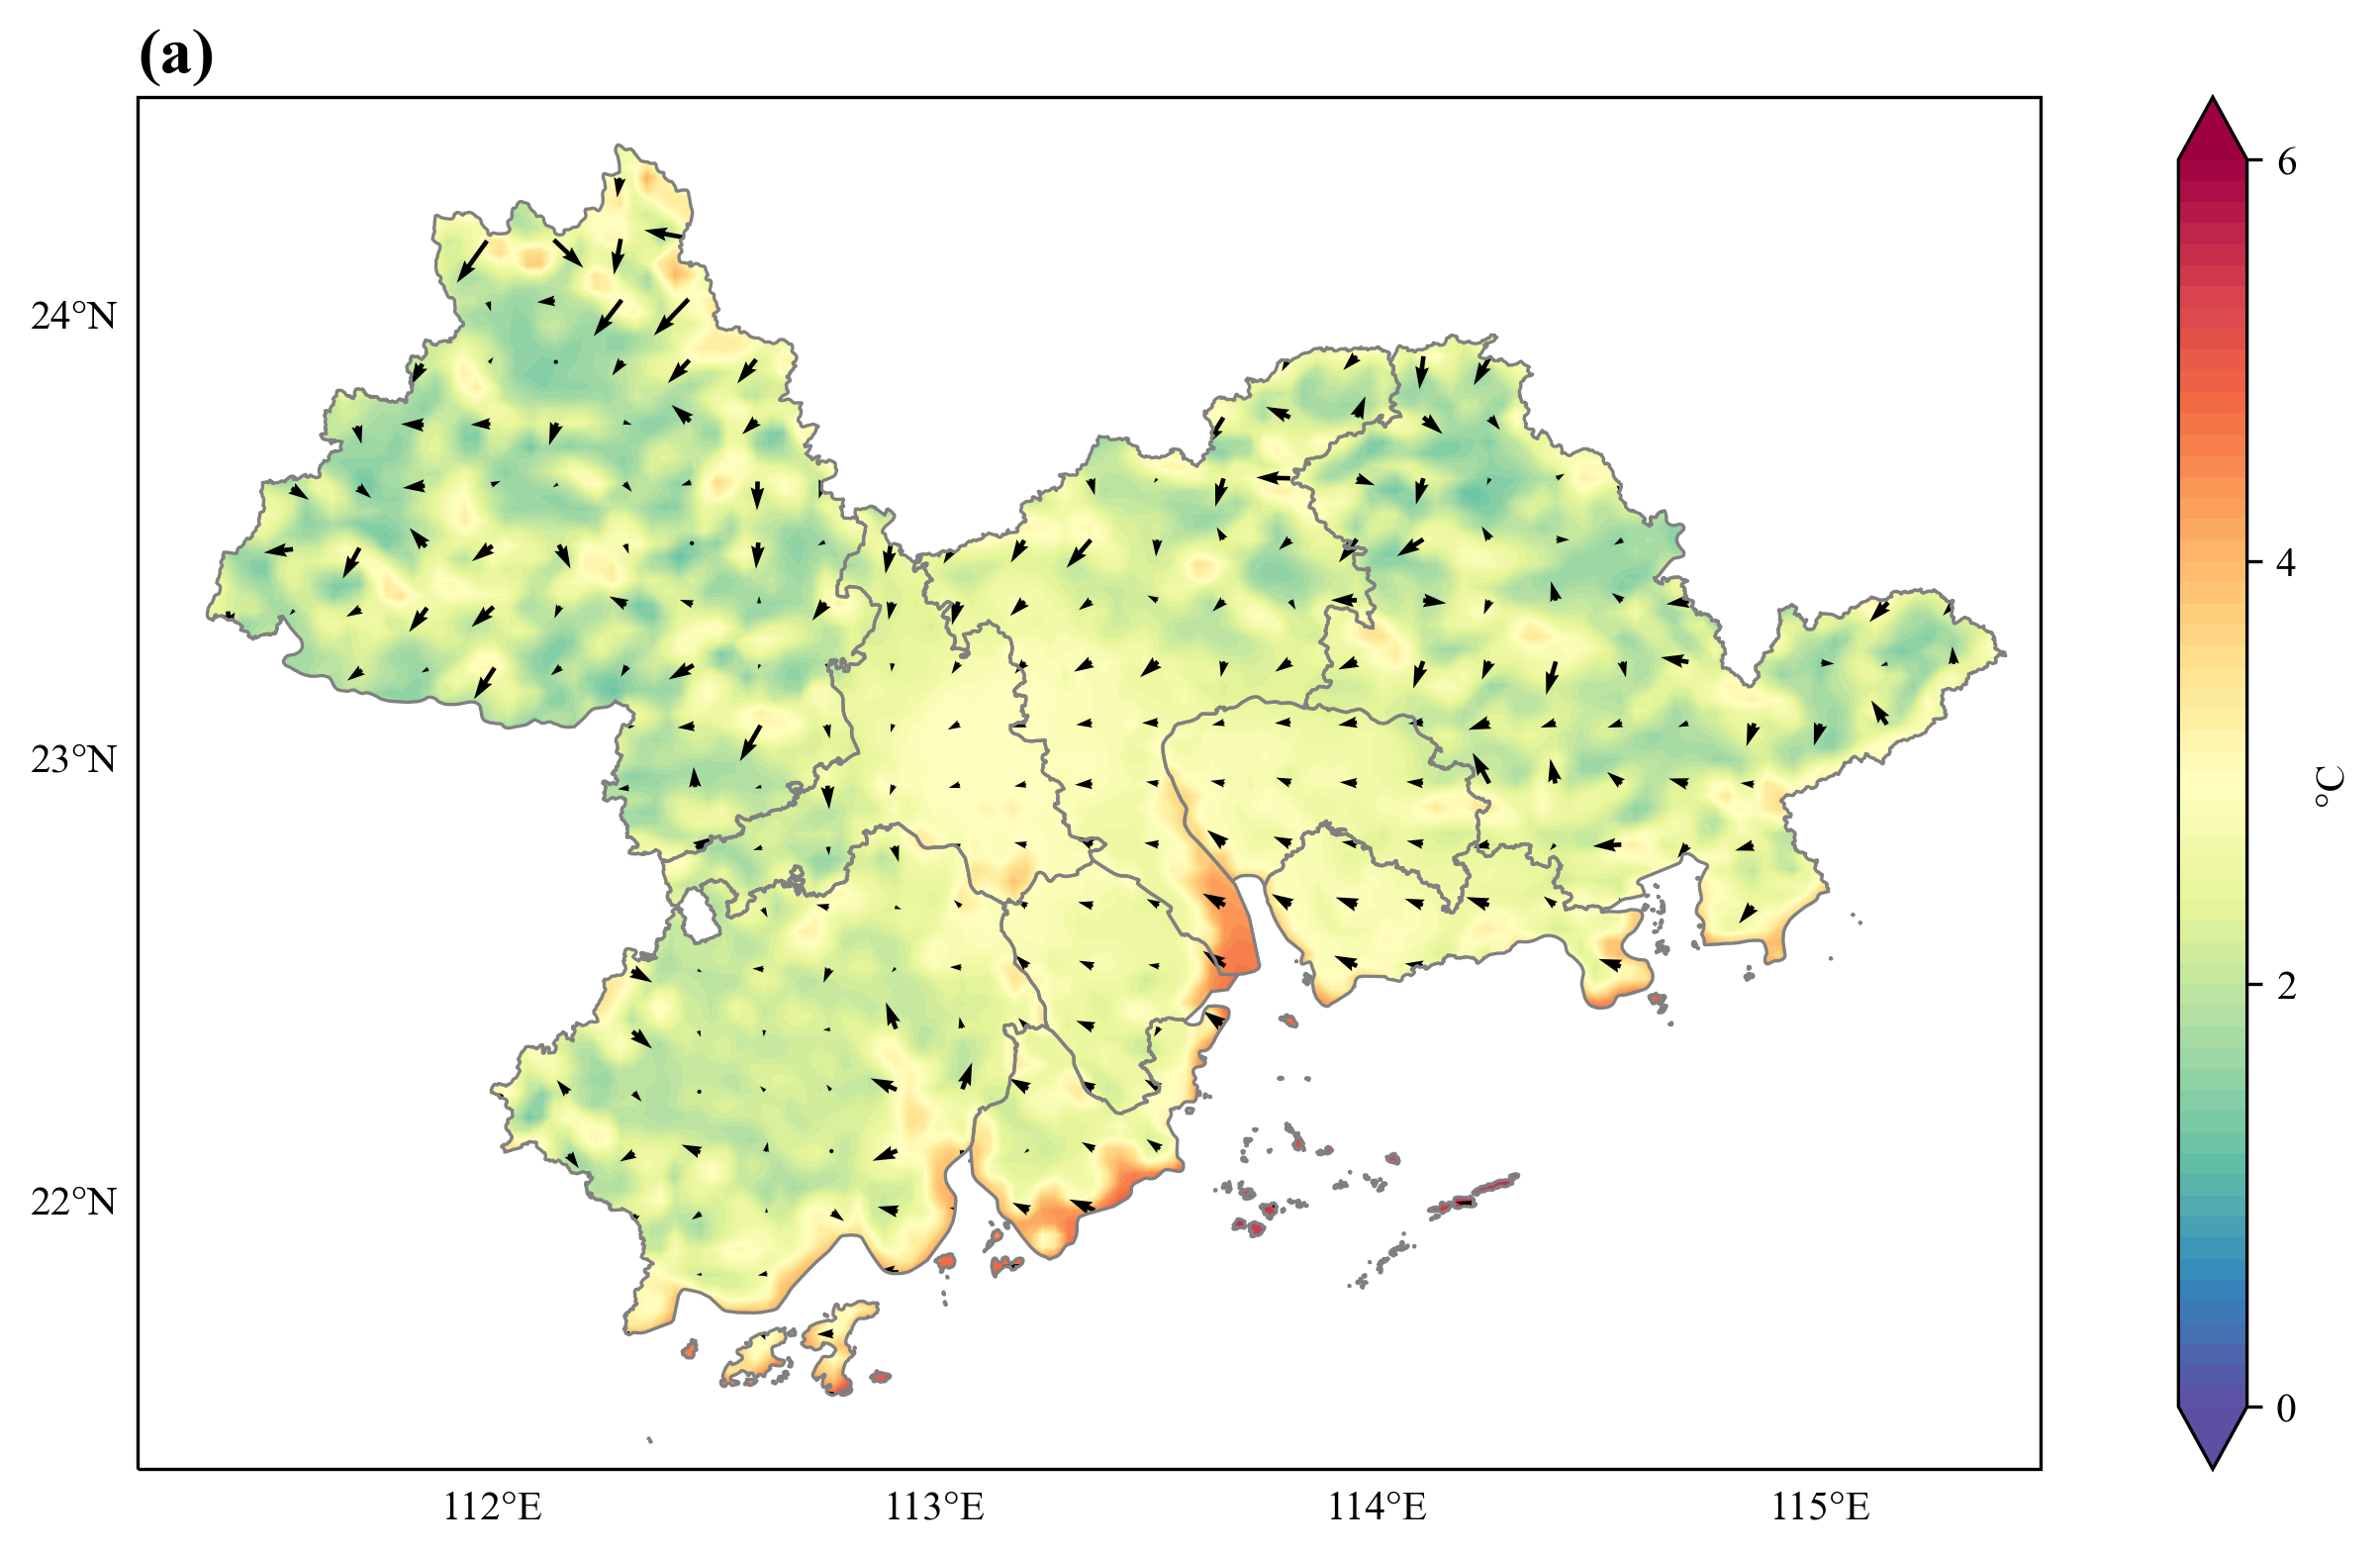

WSPD10_day_high


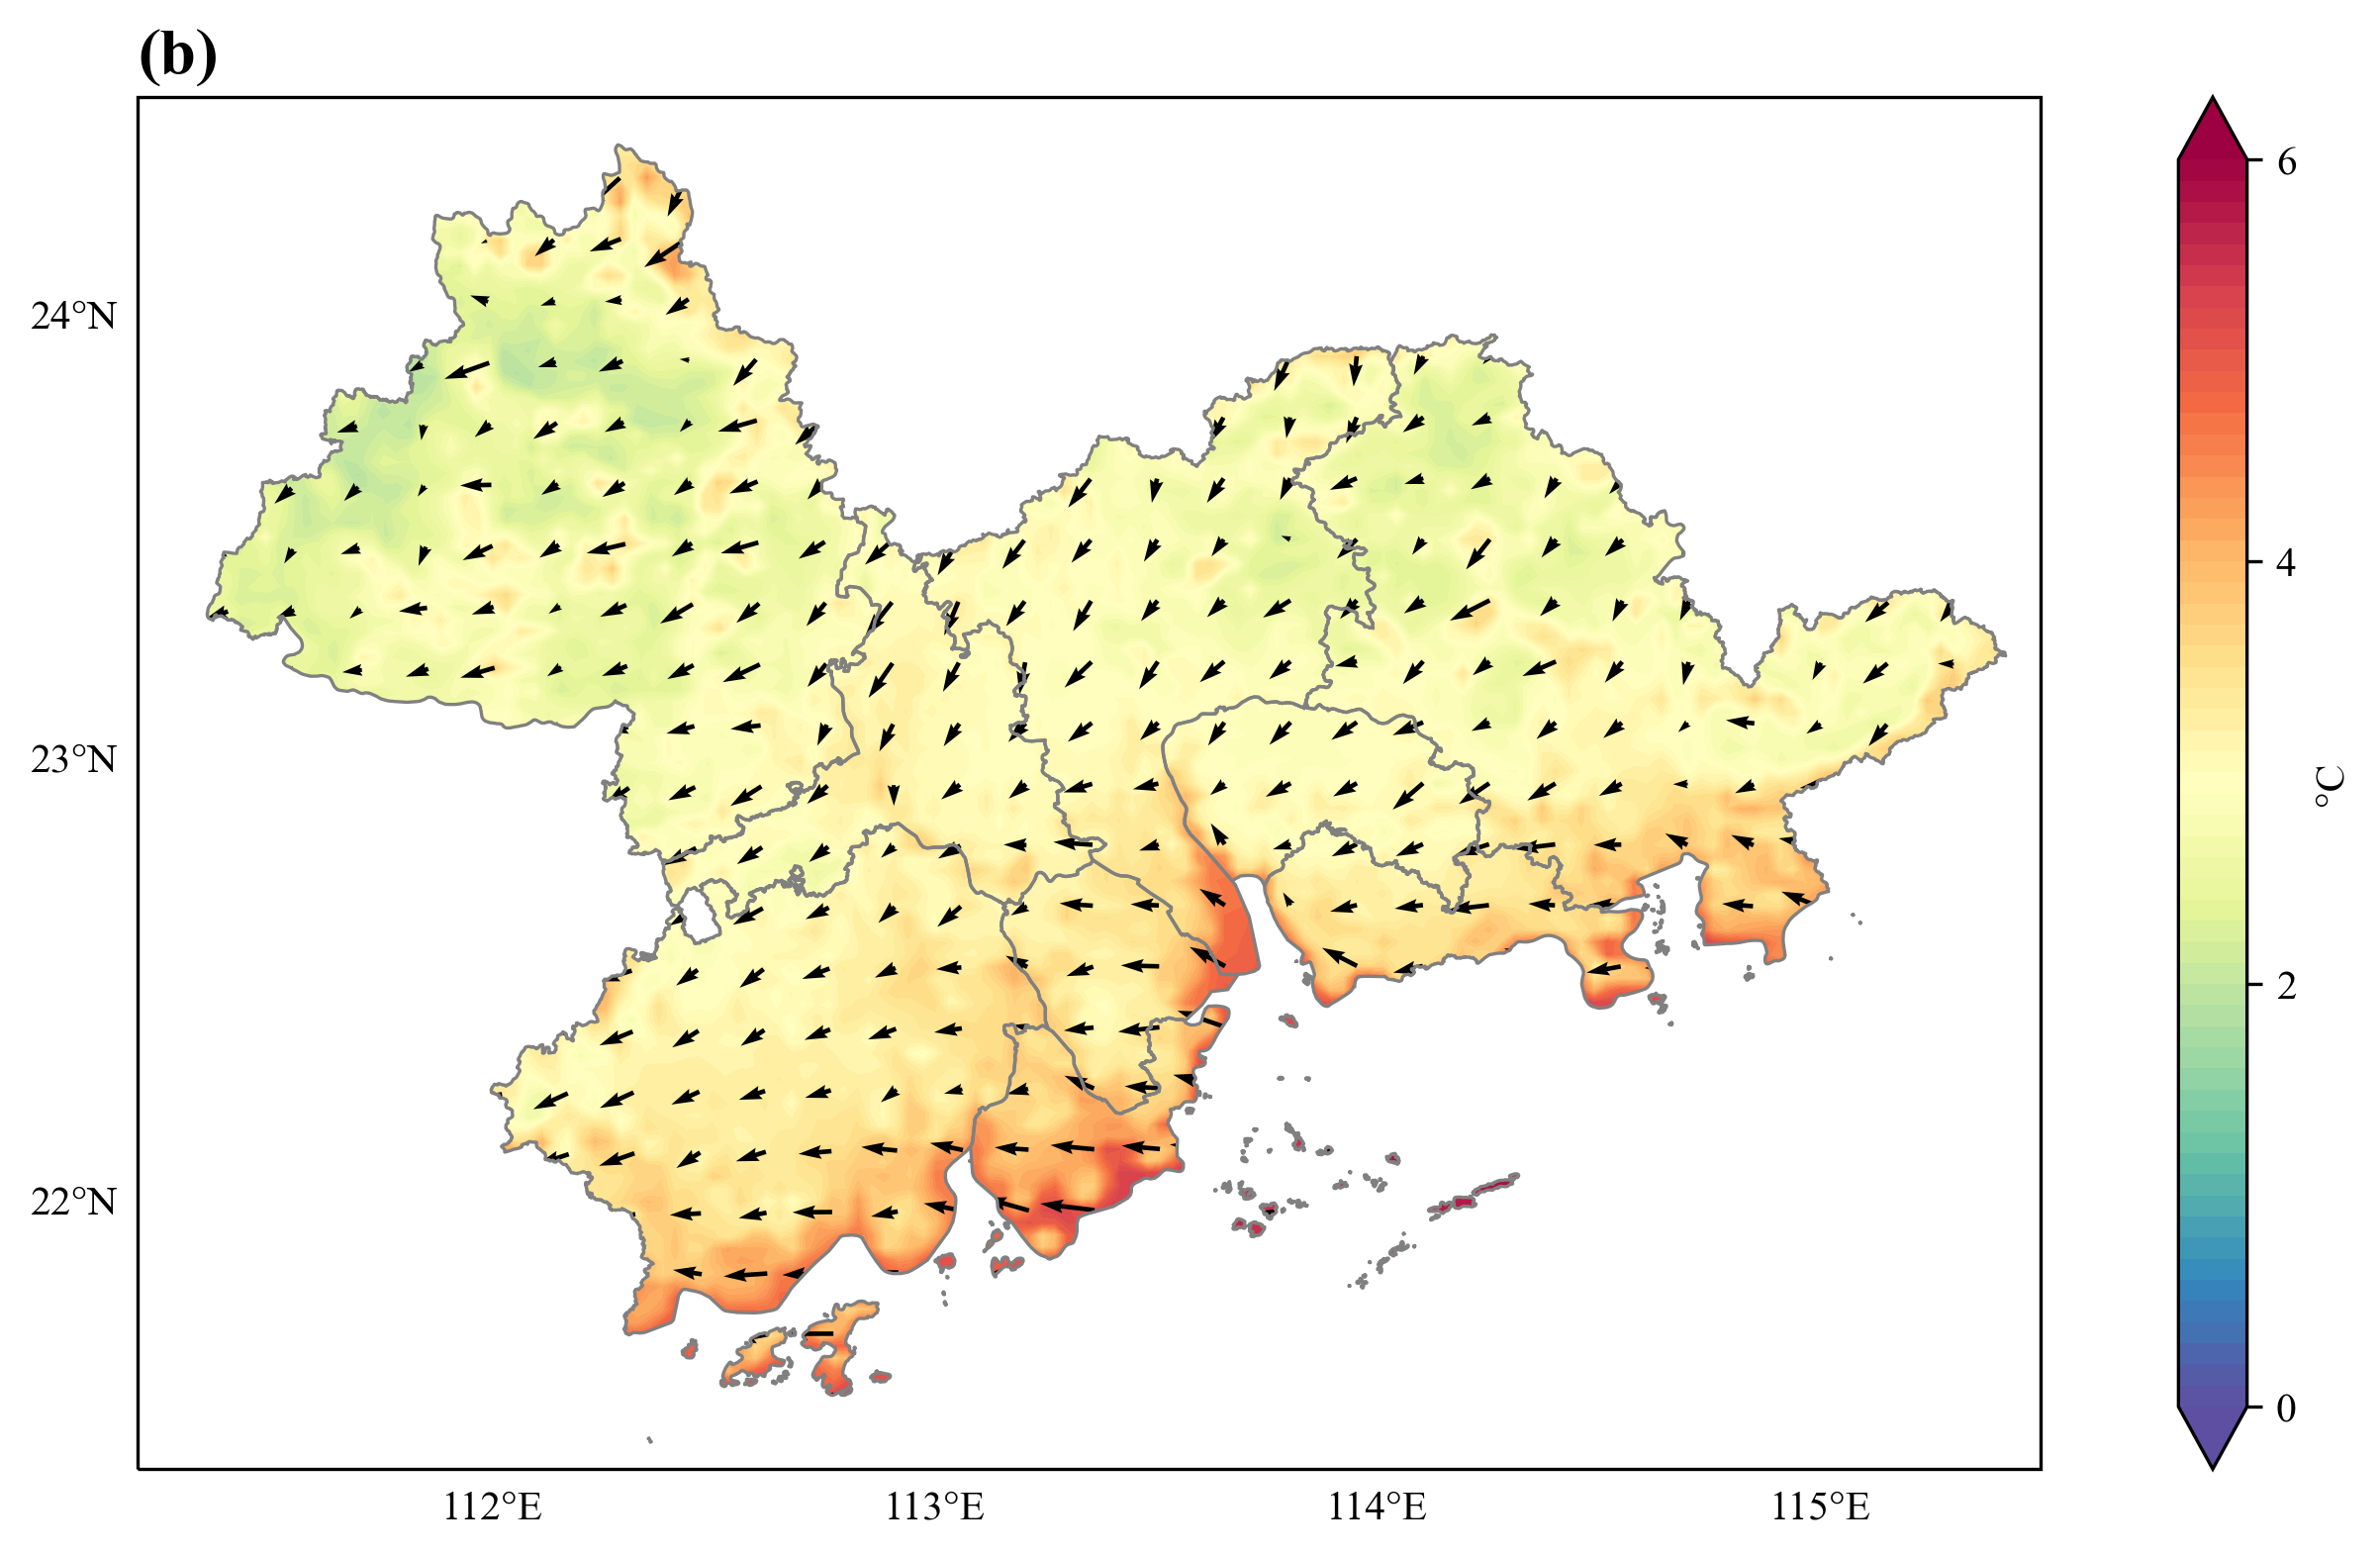

WSPD10_night_high


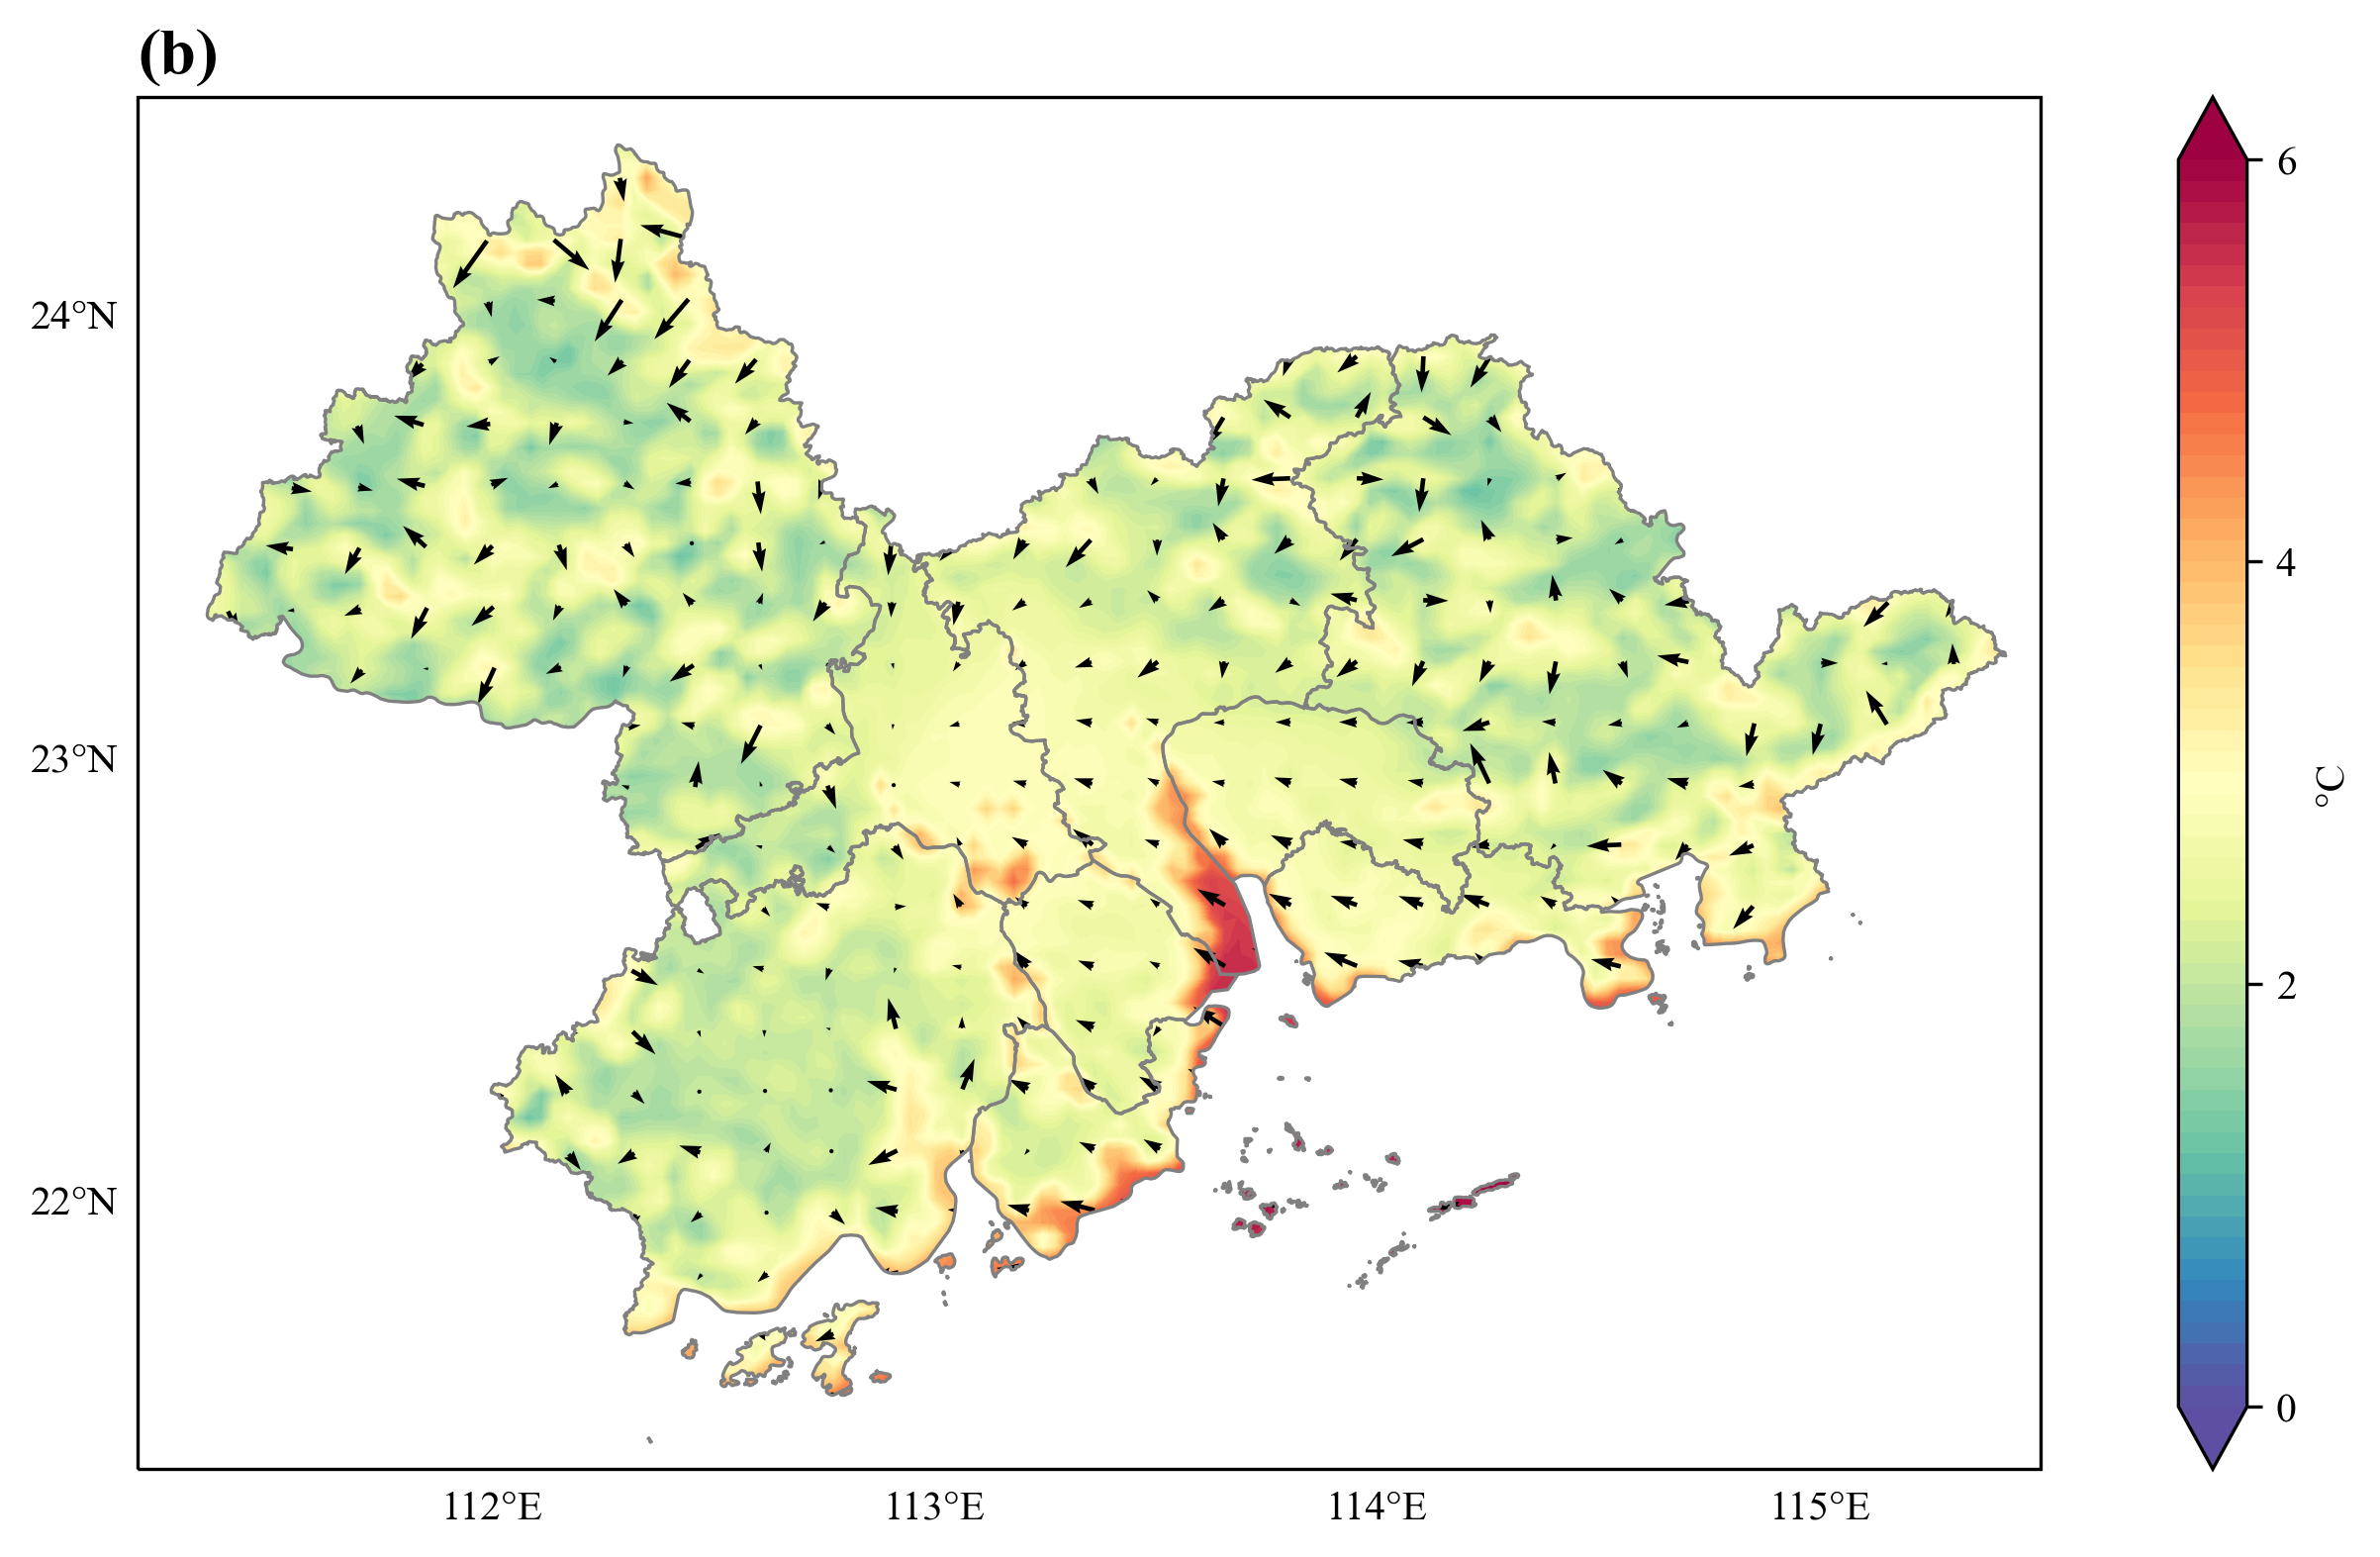

WSPD10_day_diff


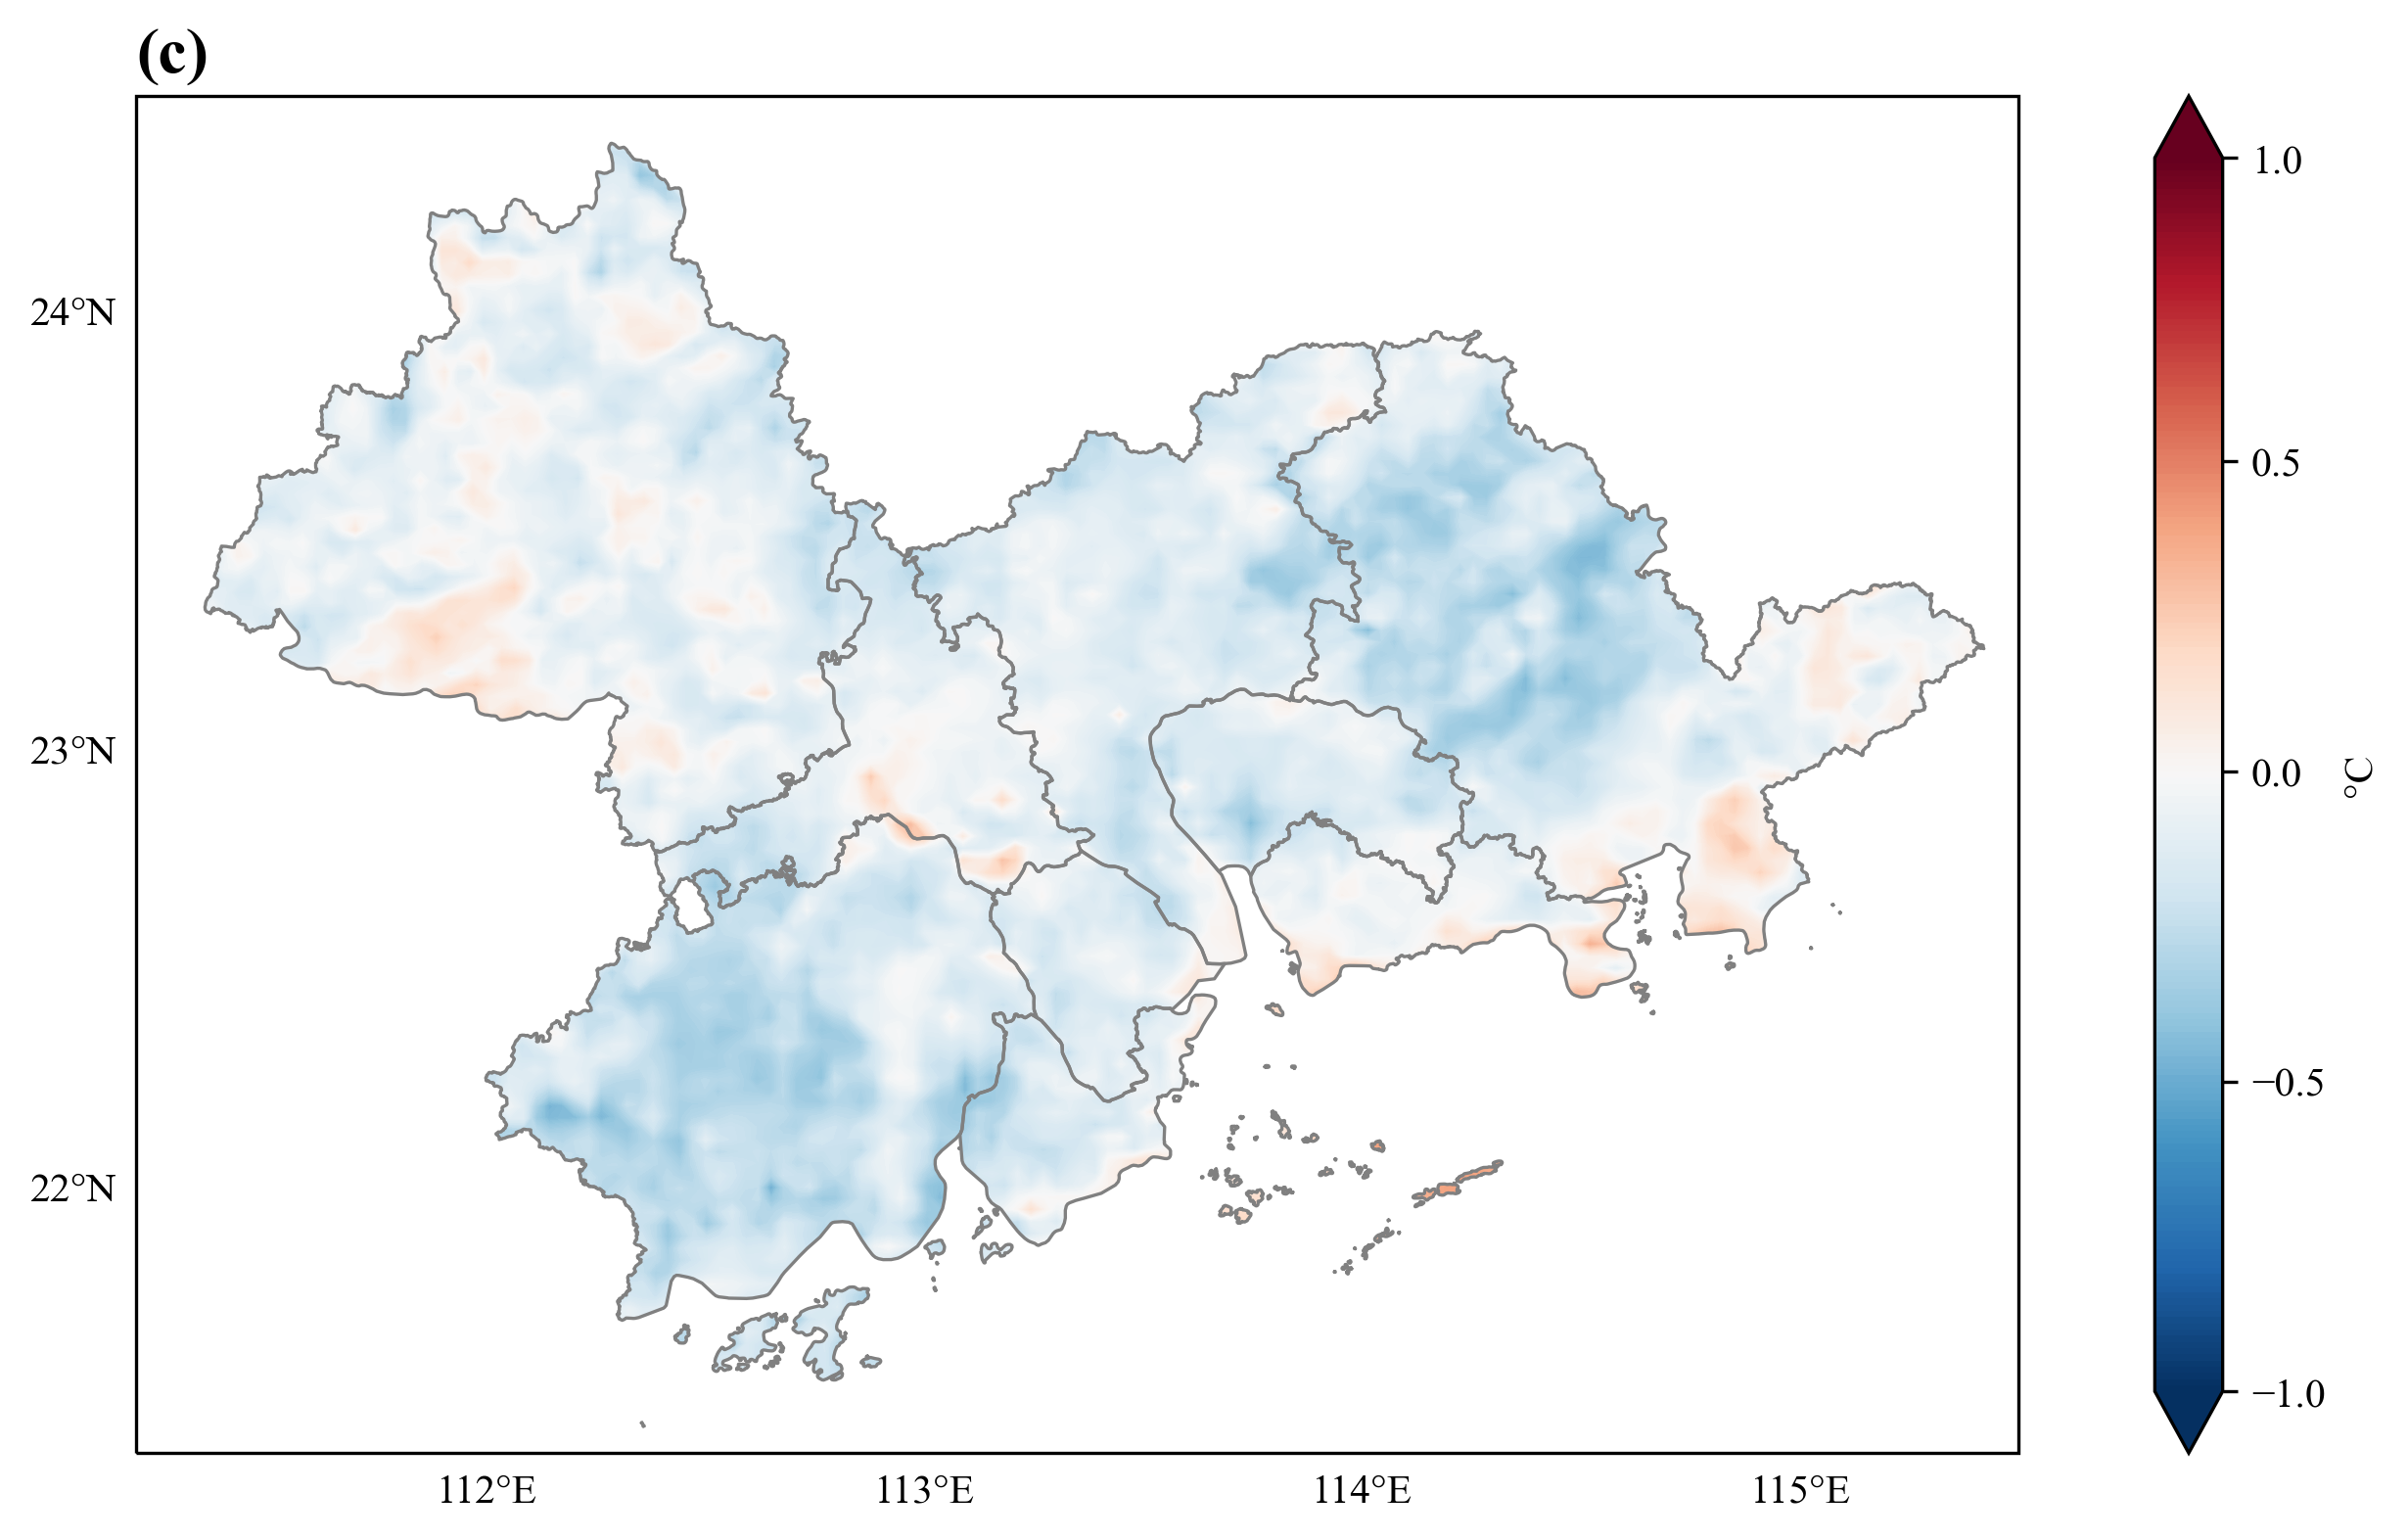

WSPD10_night_diff


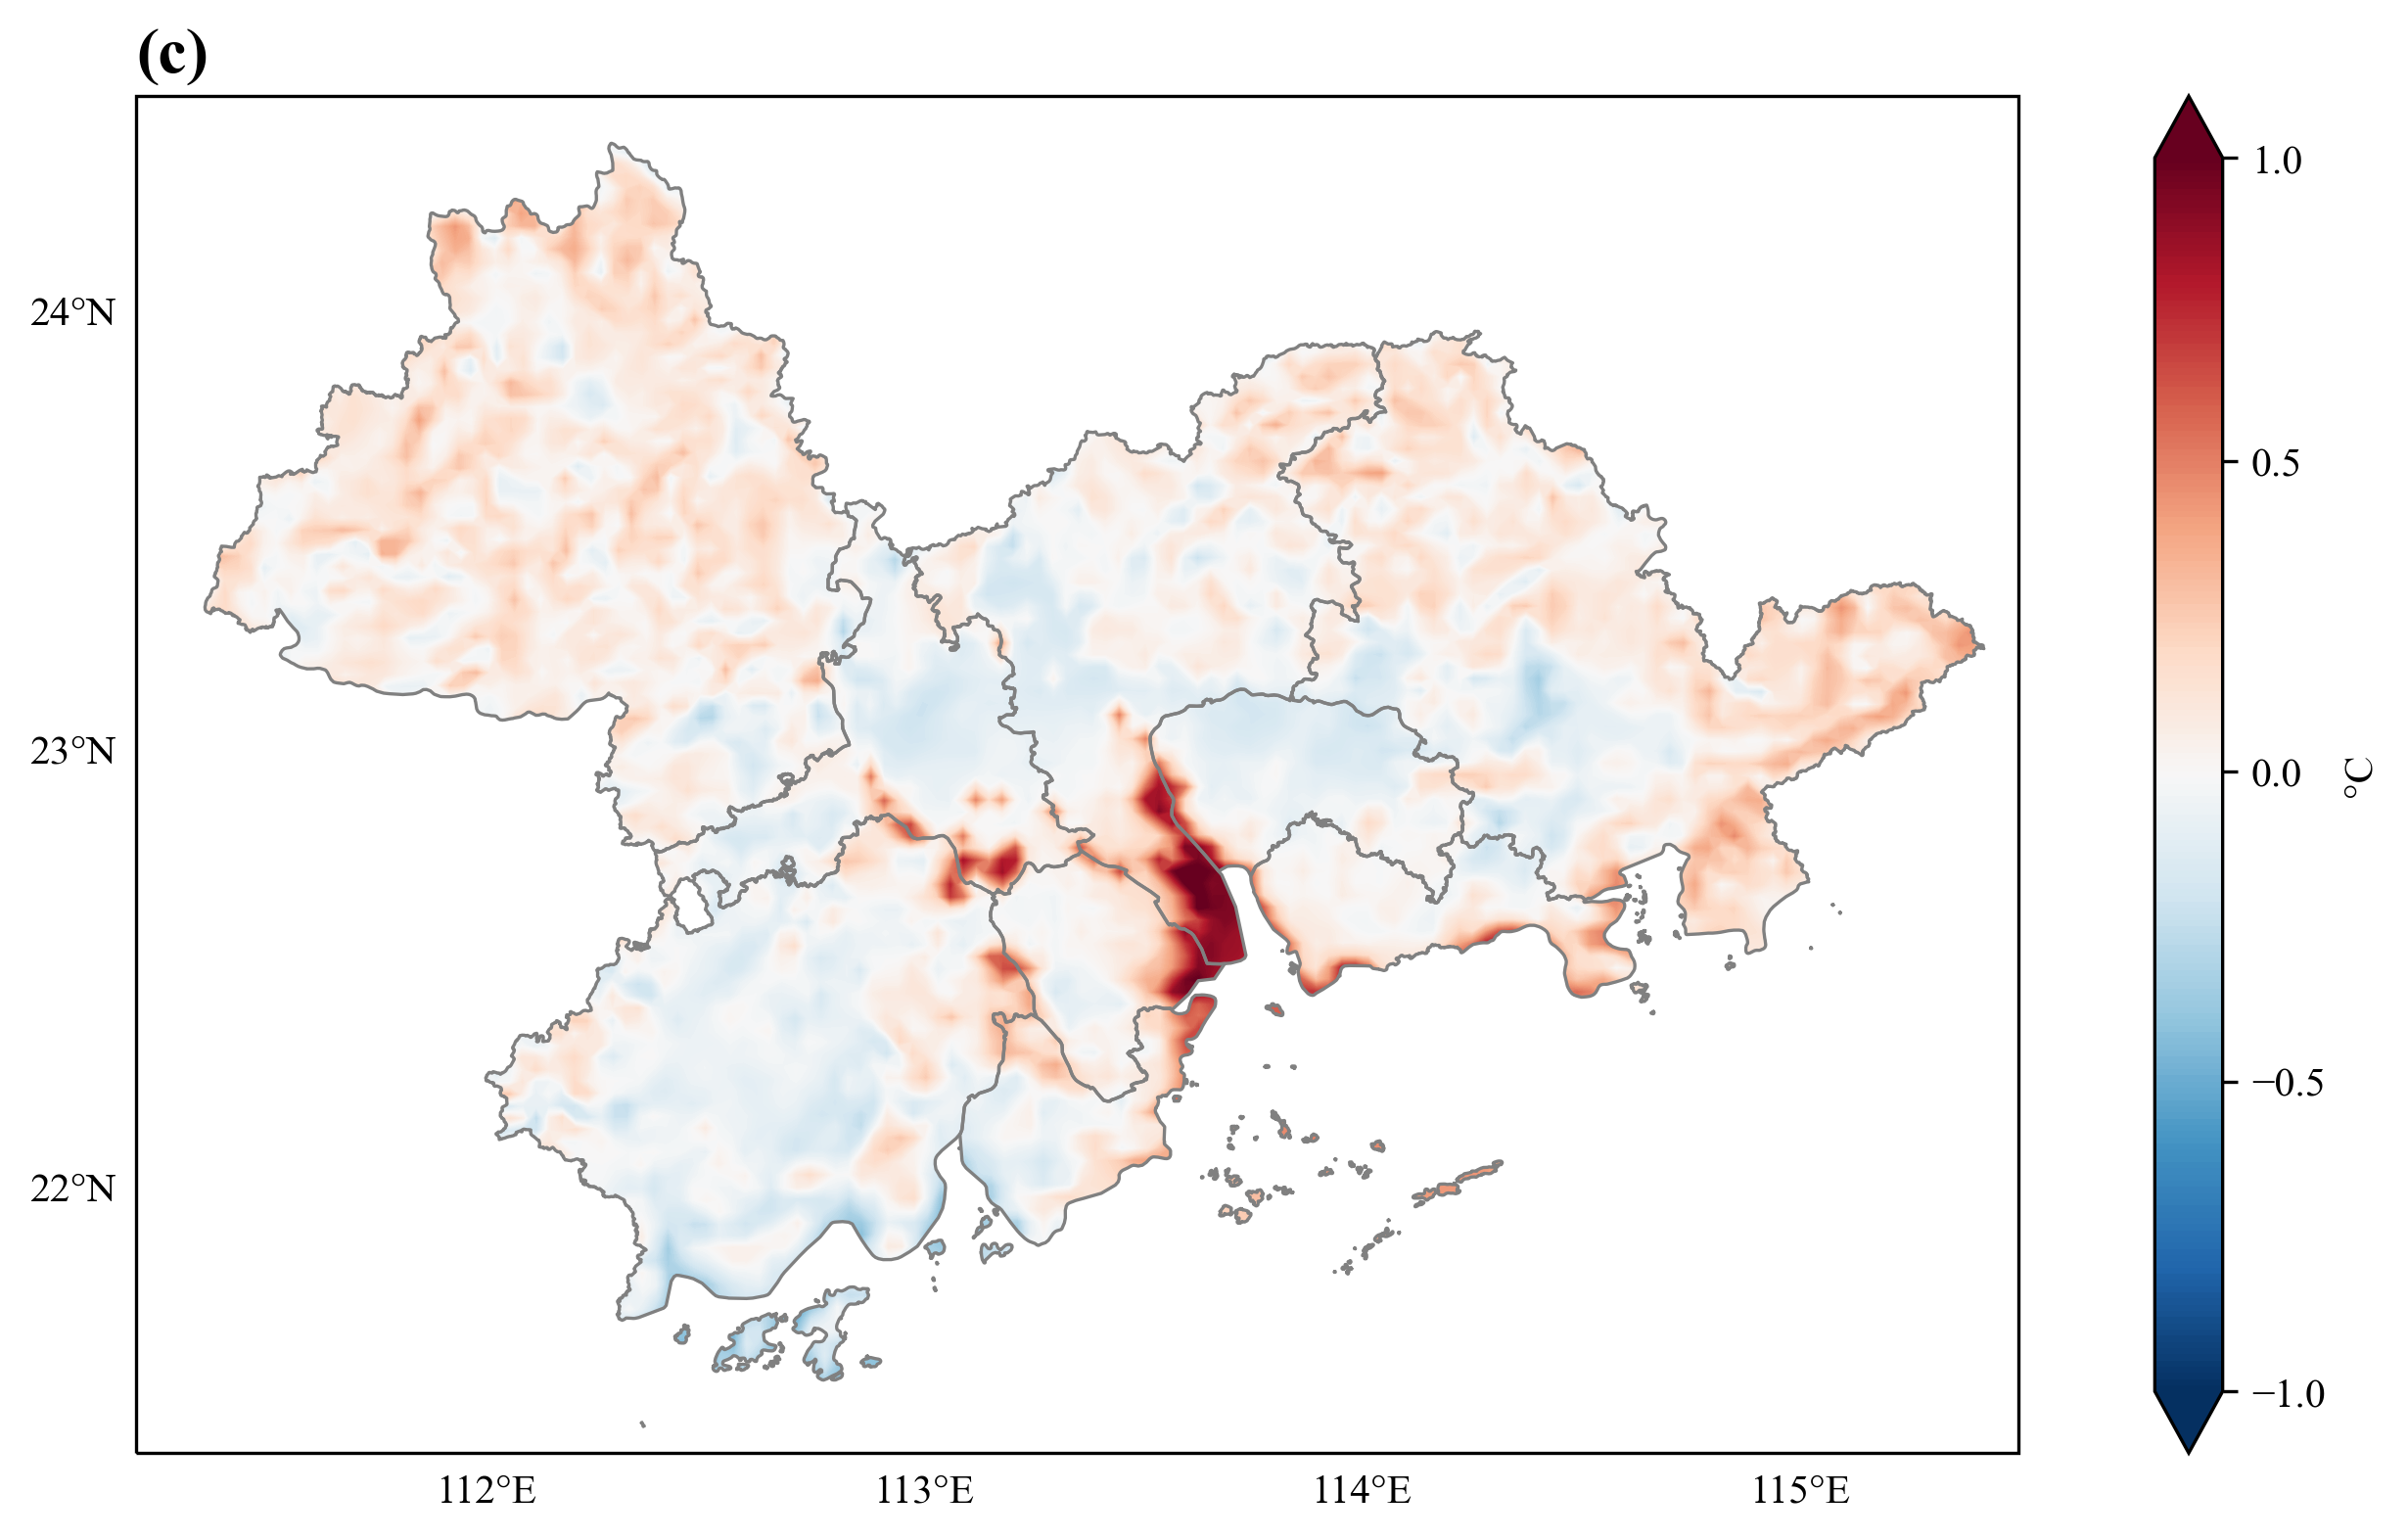

In [4]:
groups = ['low','high','diff']
periods = ['day','night']
outpath = progdir + 'Annually/figures/气象场平均态/Ground/Spatial_dn/'

for group in groups:
    for period in periods:
        print(f'{var}_{period}_{group}')
        if group is not 'diff':
            
            cmin   = 0 if period == 'day' else 0
            cmax   = 6 if period == 'day' else 6
            cmstep = 0.1 if period == 'day' else 0.1
            cbstep = 2 if period   == 'day' else 2
            title  = '(a)' if group == 'low' else '(b)'
            
            data_to_plot = eval(f'{period}_{group}')
            uwind_to_plot = eval(f'uw_{period}_{group}')
            vwind_to_plot = eval(f'vw_{period}_{group}')
            
            plot_PRD_map(avg_low, cmin, cmax, cmstep, cbstep,
                        data_to_plot, uwind_to_plot, vwind_to_plot,
                        ngrid=5, scale=100, headwidth=3,
                        title=title, colorbar_label='°C',
                        outpath=outpath+f'{var}_{period}_{group}.png')
        else:            
            cmin   = -1 if period == 'day' else -1
            cmax   = 1 if period == 'day' else 1
            cmstep = 0.01 if period == 'day' else 0.01
            cbstep = 0.5 if period == 'day' else 0.5

            data1_to_plot = eval(f'{period}_low')
            data2_to_plot = eval(f'{period}_high')
            
            plot_PRD_diff(avg_low, cmin, cmax, cmstep, cbstep,
                          data1_to_plot, data2_to_plot,
                        title='(c)', colorbar_label='°C',
                        outpath=outpath+f'{var}_{period}_{group}.png')